# <center> What is a Feature ? <br><br> Research Question: On the Issue Level, What Other Labels are Used in Conjunction with "Feature Labels" ?</center>

### Glossary

<b>Feature Label</b>: a label that contains the word "feature". <br>
<b>Feature Issue</b>: an issue that has at least one <b>feature label</b>. <br>
<b>Feature Issue Dataset</b>: a dataset containing a number of <b>feature issues</b>. Each feature issue is associated with the repository it comes from through the "repository name" column.

### Importing Required Libraries

In [26]:
import pandas as pd
import ast
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly.express as px
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Appropriate DataSet

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#pd.reset_option('max_columns')
pd.reset_option('max_colwidth')
pd.reset_option('max_rows')

def combine_partial_datasets(folder_path):
    # Get a list of all files in the specified folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    dfs = []
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

df = combine_partial_datasets('../../dataset/issues/partial_datasets/')

# Converting string to actual python lists
df['issueLabels'] = df['issueLabels'].apply(ast.literal_eval)

# Adding a column for each issue containing only its 'feature labels'
df.loc[:, 'feature_labels'] = df['issueLabels'].apply(lambda labels: [label for label in labels if "feature" in label.lower()])

print('Full Shape:', df.shape)
df.head(2)

Full Shape: (265089, 15)


,repositoryName,issueTitle,issueBody,issueNumber,issueState,issueCreatedAt,issueUpdatedAt,issueClosedAt,issueUser,assignee,issueLabels,milestone,comments,commentsURL,feature_labels
0,aws/aws-tools-for-powershell,Disable TLS Certificate Check,### Describe the feature\n\nIssue previously r...,334,open,2023-11-27 07:25:10+00:00,2023-12-08 18:20:22+00:00,NaN,BoneyAz,Not assigned,"[feature-request, module/powershell-cmdlets, q...",No milestone,2,https://api.github.com/repos/aws/aws-tools-for...,[feature-request]
1,aws/aws-tools-for-powershell,Add support for IAM Identity Center (SSO) auth...,### Describe the feature\r\n\r\nImplement nati...,332,open,2023-08-18 18:04:46+00:00,2023-08-25 16:33:08+00:00,NaN,dbaileyut,Not assigned,"[feature-request, module/powershell-cmdlets, p...",No milestone,2,https://api.github.com/repos/aws/aws-tools-for...,[feature-request]


### Group "Feature Labels" Together with their Associated Label and Count Association Occurrences

In [32]:
exploded_labels = df.explode('feature_labels').explode('issueLabels')

exploded_labels.shape

label_counts = exploded_labels.groupby(['feature_labels', 'issueLabels']).size().reset_index(name='count')

label_counts_summary_sorted = label_counts.sort_values(by='count', ascending=False)

label_counts_summary_sorted = label_counts_summary_sorted[label_counts_summary_sorted['count'] > 1300]
label_counts_summary_sorted = label_counts_summary_sorted[label_counts_summary_sorted['feature_labels'] != label_counts_summary_sorted['issueLabels']]

In [33]:
label_counts_summary_sorted.head()

,feature_labels,issueLabels,count
8687,feature,good first issue,3274
8432,feature,enhancement,3271
8770,feature,help wanted,2854
26805,kind/feature,lifecycle/rotten,2709
27665,kind/feature,triage/accepted,2667


### Plot Results

In [34]:
fig = px.bar(
    label_counts_summary_sorted,
    x='feature_labels', y='count', color='issueLabels',
    labels={'feature_labels': 'Feature Label', 'count': 'Count', 'issueLabels': 'Issue Label'},
    title='Distribution of Labels for "Feature Labels" on the Issue Level',
)

fig.update_layout(
    xaxis=dict(tickangle=45, tickmode='array'),
    legend_title_text='issueLabels',
)

fig.show()

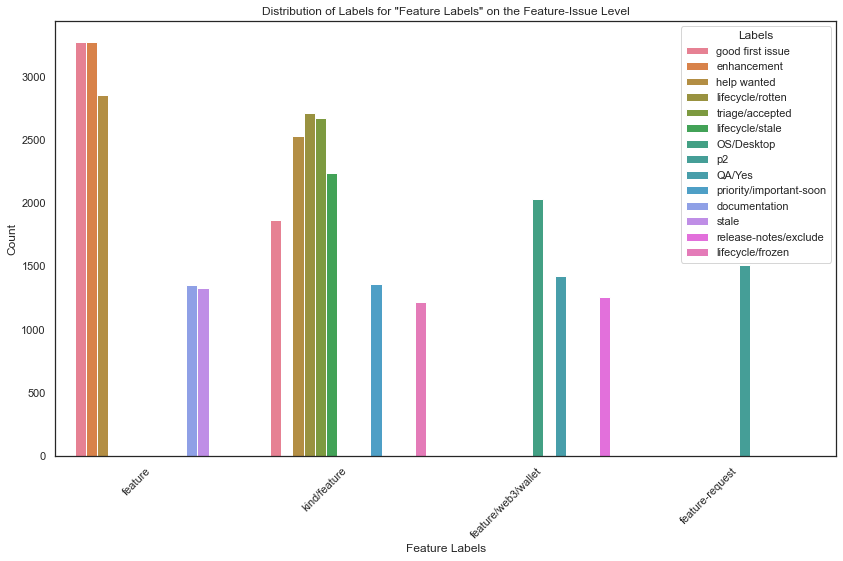

In [31]:
plt.figure(figsize=(14, 8))
sns.barplot(x='feature_labels', y='count', hue='issueLabels', data=label_counts_summary_sorted)
plt.xlabel('Feature Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels for "Feature Labels" on the Feature-Issue Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Labels', title_fontsize='12')
plt.show()